In [37]:
import pandas as pd
import time
from datetime import datetime
from pandas import ExcelWriter 
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import seaborn as sns
sns.set()

pd.__version__




ModuleNotFoundError: No module named 'seaborn'

In [38]:
# temp=1588744463872/1000
time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(temp))

'2020-05-06 13:54:39'

In [39]:
temp=1588744479826/1000
time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(temp))

'2020-05-06 13:54:39'

In [40]:
    # Total number of seconds between dates

In [41]:
class JTLReader:
    def __init__(self,jtlPath):
        self.jtlPath=jtlPath
        self.jtlColumns = ['timeStamp', 'elapsed','label','threadName','dataType','bytes','sentBytes','URL','allThreads','success','responseCode','responseMessage']
        self.df_Jtl=pd.read_csv(self.jtlPath,usecols=self.jtlColumns,dtype={'label':'category'})#dtype={'label':'category'},nrows=195222    
        self.df_Jtl.sort_values(by=['timeStamp'],inplace=True) 
        self.df_Jtl.reset_index(drop=True, inplace=True)
        self.shape=self.df_Jtl.shape
        self.rows=self.shape[0]
        self.rows
        """Conver Epoc time to Actual Time Start"""
        self.df_Jtl['timeStamp'] = pd.to_datetime(self.df_Jtl['timeStamp'],unit='ms')
        self.df_Jtl['timeStamp'] = self.df_Jtl['timeStamp'].astype('datetime64[s]')#reduce precision pandas timestamp dataframe
        self.df_Jtl['timeStamp']=self.df_Jtl['timeStamp'].dt.tz_localize('utc').dt.tz_convert('Singapore')
        self.df_Jtl['timeStamp'] = self.df_Jtl['timeStamp'].astype(str).str[:-6]
        self.df_Jtl['timeStamp'] = pd.to_datetime(self.df_Jtl['timeStamp'])
        self.df_Jtl['timeStamp'] = self.df_Jtl['timeStamp'].astype('datetime64[s]')
        """Conver Epoc time to Actual Time End"""
        
      

        """Saving master data frame to export to excel"""
        
        
        """Filter Transaction Controller & HTTP Request"""
        self.filt=(pd.isnull(self.df_Jtl['URL'])) #& (pd.isnull(self.df_Jtl['dataType']))
        self.df_jtl_TC=self.df_Jtl.loc[self.filt]
        self.df_jtl_HTTPReqeust=self.df_Jtl.loc[~self.filt]
        """Error Handling To be updated"""
        self.error_filt=(self.df_jtl_HTTPReqeust['success']==False) | (self.df_jtl_HTTPReqeust['success']==True)
        self.df_HttpErrors=self.df_jtl_HTTPReqeust.loc[self.error_filt]      
          
              
        
    """def getTransactionControllerData(self):
        print("Hello shiva")
        filt=(pd.isnull(self.df_Jtl['URL'])) & (pd.isnull(self.df_Jtl['dataType']))
        self.df_jtl_TC=self.df_Jtl.loc[filt]
        return self.df_jtl_TC"""
        

        
    def converTimeStamp(self):
        self.df_Jtl['timeStamp'] = pd.to_datetime(self.df_Jtl['timeStamp'],unit='ms')
        self.df_Jtl['timeStamp'] = self.df_Jtl['timeStamp'].astype('datetime64[s]')#reduce precision pandas timestamp dataframe
        self.df_Jtl['timeStamp']=self.df_Jtl['timeStamp'].dt.tz_localize('utc').dt.tz_convert('Africa/Cairo')#Africa/Cairo
        self.df_Jtl['timeStamp'] = self.df_Jtl['timeStamp'].astype(str).str[:-6]
        self.df_Jtl['timeStamp'] = pd.to_datetime(self.df_Jtl['timeStamp'])
        self.df_Jtl['timeStamp'] = self.df_Jtl['timeStamp'].astype('datetime64[s]') 
        
    def ms_to_sec(self):
         self.df_Jtl['elapsed']=((self.df_Jtl['elapsed'])/1000)
        
        
    def overAllResponseTimeSummary(self):
        self.df_overAllResponseTimeSummary=self.df_jtl_TC[['timeStamp','elapsed']]
        return self.df_overAllResponseTimeSummary
       
    def listOfErrors(self):
        return self.df_Jtl['responseCode'].value_counts()
    
    def shapeOfDaraFrame(self):
        return self.df_Jtl.shape
    
    def columnType(self,columnName):
        self.columnName=columnName
        return self.df_Jtl[self.columnName].dtype
    
    def getPeriod(self):
        self.startTime=self.df_Jtl['timeStamp'][0]
        self.endRow=self.df_Jtl['timeStamp'].shape[0]
        self.endTime=self.df_Jtl['timeStamp'][self.endRow-1]
        return f'{self.startTime} : {self.endTime}'
    
    def getDuration(self):
        self.startTime= self.df_Jtl['timeStamp'][0]
        self.endRow= self.df_Jtl['timeStamp'].shape[0]
        self.endTime= self.df_Jtl['timeStamp'][self.endRow-1]#-1
        self.executionStartTime=datetime(self.startTime.year,self.startTime.month,self.startTime.day,self.startTime.hour,self.startTime.minute,self.startTime.second)
        self.executionEndTime=datetime(self.endTime.year,self.endTime.month,self.endTime.day,self.endTime.hour,self.endTime.minute,self.endTime.second)
        self.timeDiff = self.executionEndTime-self.executionStartTime
        self.duration_in_s = self.timeDiff.total_seconds()
        self.duration=time.strftime("%H:%M:%S", time.gmtime(self.duration_in_s))
        return self.duration
    
    def getMaxRunningVusers(self):
        self.allThread=self.df_Jtl['allThreads'].max()
        return self.allThread 
    
      
    def getTotalHits(self):
        return self.df_jtl_HTTPReqeust.shape[0]
    
    def getAvgHitsPerSecond(self):
        return self.df_jtl_HTTPReqeust.shape[0]/self.duration_in_s
    
    def getTotalThroughput(self):
        self.totalThroughput=self.df_jtl_TC['bytes'].sum()
        return self.totalThroughput
    
    def getAvgThroughputPerSecond(self):
        self.avgThroughput=(self.df_jtl_TC['bytes'].sum())/self.duration_in_s
        return self.avgThroughput
    
    def getTotalPassFailFreqList(self):
        self.passFail_freq=self.df_jtl_TC['success'].value_counts().to_frame()
        #self.passFailFrequencyeqList=self.passFail_freq.index.tolist()
        
        return self.passFail_freq      
    
    def getTotalErrors(self):
        self.totalError=self.df_HttpErrors[['responseCode']].groupby(['responseCode'])
        self.totalError=self.df_HttpErrors['responseCode'].count()
        return self.totalError

    def getAnalysisSummary(self):
        self.period=self.getPeriod()
        self.duration=self.getDuration()
        self.maxRunningVusers=self.getMaxRunningVusers()
        self.totalThroughput=self.getTotalThroughput()
        self.avgThroughputPerSecond=self.getAvgThroughputPerSecond()
        self.totalHits=self.getTotalHits()
        self.avgHitsPerSecond=self.getAvgHitsPerSecond()
        self.totalErrors=self.getTotalErrors()
        self.df_AnalysisSummary=pd.DataFrame(
            {
                'Data':[
                        'Period','Duration','Maximum Running Vusers','Total bytes',
                        'Average bytes/second','TotalHits','Average Hits Per Second',
                        'Total Error','Total Pass','Total Failed'
                ],
                'Values':[
                            self.period,self.duration,self.maxRunningVusers,self.totalThroughput,
                            self.avgThroughputPerSecond,self.totalHits,self.avgHitsPerSecond,
                            self.totalErrors,self.getTotalPassFailFreqList(),'NA'
                ]
                
            }
        )
        return self.df_AnalysisSummary
    
    def responseTimeSummary(self):
        self.df_responseTimeSummary=self.df_jtl_TC[['label','elapsed']]
        self.df_txnGroup=self.df_responseTimeSummary.groupby(['label'],observed=True )  #observed=True      
        self.df_txnGroup=self.df_txnGroup['elapsed'].describe(percentiles=[.90])#self.df_txnGroup.describe(percentiles=[.90])
        self.df_txnGroup.columns=self.df_txnGroup.columns.get_level_values(0)#self.df_txnGroup.columns=self.df_txnGroup.columns.get_level_values(1)
        self.df_txnGroup = self.df_txnGroup[['count','min','mean','90%','max',]]
        self.df_txnGroup.rename(columns={'count':'#Samples','min':'Min','mean':'Average','90%':'90 Percentile','max':'Max'},inplace=True)
        ##self.df_txnGroup=self.df_txnErrorGroup.reset_index() """To be enable if you run describe () on data frame. Now we are running on specific column"""
        ##self.df_txnGroup['throughput']=self.df_txnGroup['count']/self.duration_in_s
        ##self.validTxn_filt=(self.df_txnGroup['count']>0)
        self.df_responseTimeSummaryOutput=self.df_txnGroup #self.df_txnGroup[self.validTxn_filt]
       
        return self.df_responseTimeSummaryOutput
    
    def getPassFailSummary(self):
        self.df_passFailSummary=self.df_jtl_TC[['label','success']]
        self.df_passFailGroup=self.df_passFailSummary.groupby(['label'],observed=True)#whe we use observed=True-->refer https://stackoverflow.com/questions/54922327/valueerror-operands-could-not-be-broadcast-together-with-shape-when-calling-pan?answertab=votes#tab-top
        self.df_txnGroup=self.df_passFailGroup['success'].value_counts()
        self.df_txnGroupSlice=self.df_txnGroup.loc[:,]
        self.df_passFailSummaryOutput=self.df_txnGroupSlice.unstack()
        self.df_passFailSummaryOutput=self.df_passFailSummaryOutput.fillna(0)
        self.df_passFailSummaryOutput.rename(columns={True:'Pass',False:'Fail'},inplace=True)
        return self.df_passFailSummaryOutput
        
    def getFinalResponseSummary(self):
        rs=pd.merge(self.df_responseTimeSummaryOutput,self.df_passFailSummaryOutput,left_index=True,right_index=True)
        if 'Fail' in rs.columns:# If transaction fail observed 
            rs['Error%']=((rs['Fail'])/(rs['#Samples']))*100 
            rs=rs[['#Samples','Pass','Fail','Error%','Min','Average','90 Percentile','Max']]#'Fail','Error%'
            return rs
        else:# All transactions pass
            rs=rs[['#Samples','Pass','Min','Average','90 Percentile','Max']]
            
            return rs
            
            
    
    def getRunnerVuserGraphData(self):
        '''T=min,S=Seconds'''       
        self.df_vusers=self.df_jtl_TC[['timeStamp','allThreads']]
        self.df_vusers.sort_values(by=['timeStamp'])
        self.df_vusers.set_index('timeStamp',inplace=True)
        self.df_vusers_summary = pd.DataFrame()
        self.df_vusers_summary['Vusers']=self.df_vusers['allThreads'].resample('10S').max()  
        self.df_vusers_summary.ffill(inplace=True)
        return self.df_vusers_summary
         
        
    
    def getHitsPersecondGraphData(self):
        '''T=min,S=Seconds'''
        #self.df_jtl_HTTPReqeust['hits']=1
        self.df_hits=self.df_jtl_HTTPReqeust[['timeStamp','URL']]#self.df_jtl_HTTPReqeust[['timeStamp','hits']]
        #self.df_hits.sort_values(by=['timeStamp'])
        self.df_hits.set_index('timeStamp',inplace=True)
        self.df_hits_summary = pd.DataFrame()
        self.df_hits_summary['hitsCount']=self.df_hits['URL'].resample('10S').count()/60   
        #df.loc[(df!=0).any(axis=1)]
        self.df_hits_summary=self.df_hits_summary.loc[(self.df_hits_summary!=0).any(axis=1)]
        return self.df_hits_summary
        #return self.df_hits
    
    def getThrouhputPersecondGraphData(self):
        '''T=min,S=Seconds'''
        self.df_throughput=self.df_jtl_TC[['timeStamp','bytes']]
        #self.df_throughput.sort_values(by=['timeStamp'])
        self.df_throughput.set_index('timeStamp',inplace=True)
        self.df_throughput_summary = pd.DataFrame()
        self.df_throughput_summary['ThroughputReceived']=self.df_throughput['bytes'].resample('10S').sum()/60 
        return self.df_throughput_summary.astype(int)
        
    
    def getThrouhputSendPersecondGraphData(self):
        '''T=min,S=Seconds'''
        self.df_throughputsend=self.df_jtl_TC[['timeStamp','sentBytes']]
        #self.df_throughputsend.sort_values(by=['timeStamp'])
        self.df_throughputsend.set_index('timeStamp',inplace=True)
        self.df_throughputsend_summary = pd.DataFrame()
        self.df_throughputsend_summary['ThroughputSend']=self.df_throughputsend['sentBytes'].resample('10S').sum()/60    
        return self.df_throughputsend_summary.astype(int)
    
    def getErrorPersecondGraphData(self):
        '''T=min,S=Seconds'''
        self.df_errorCode=self.df_HttpErrors[['timeStamp','responseCode']]
        #self.df_throughputsend.sort_values(by=['timeStamp'])
        self.df_errorCode.set_index('timeStamp',inplace=True)
        self.df_errorCode_summary = pd.DataFrame()
        self.df_errorCode_summary['HTTPError']=self.df_errorCode['responseCode'].resample('1T').count() 
        return self.df_errorCode_summary
    
    def gerErrorPivot(self):
        self.df_df_HttpErrors_pivot=self.df_HttpErrors[['timeStamp','responseCode','responseMessage']]
        return self.df_df_HttpErrors_pivot.pivot_table(index=pd.Grouper(freq='T',key='timeStamp'),columns="responseMessage",aggfunc="count")        
 
    
    def getOverallResponseTime(self):
        return self.df_jtl_TC[['timeStamp','elapsed','label']]
    
    def getRawDataFrame(self):
        return self.df_Jtl
    
#     def get errorSummary(self):
#         self.filt_error=(self.df_jtl_HTTPReqeust['responseCode']!=200) & (self.df_jtl_HTTPReqeust['responseCode']!=202)
#         self.df_error=self.df_jtl_HTTPReqeust[self.filt_error]
#         return self.df_error
    
    def temp(self):
        self.slicer_grp=self.df_jtl_TC[['timeStamp','elapsed','label']]
        self.slicer_grp.sort_values(by=['timeStamp'])
        self.slicer_grp.set_index('timeStamp',inplace=True)
        self.df_response_summary_slicer = pd.DataFrame()
        self.df_slicer_txnGroup=self.slicer_grp.groupby(['label'],observed=True )
        self.df_response_summary_slicer=self.df_slicer_txnGroup['elapsed'].resample('30T').agg(['min','mean','max','count'])
        return self.df_response_summary_slicer
    
    def getDetailHttpErrors(self):
        self.df_errors=self.df_HttpErrors[['timeStamp','label','responseCode','responseMessage']]
        return  self.df_errors
    
    def getHttpErrorSummary(self):
        self.df_HttpErrorSummary=self.df_HttpErrors[['responseCode','responseMessage']].groupby(['responseCode'])
        self.df_HttpErrorSummary=self.df_HttpErrors['responseCode'].value_counts()
        return self.df_HttpErrorSummary
    
    
      
obj1=JTLReader("D:\\Projects\\AllSec\\Scripts\\Reports\\smoketest_27_mar\\smoketest_02_OutPut.jtl") 
#obj1.converTimeStamp()
obj1.ms_to_sec() 
obj1.getDuration()



'00:45:12'

In [42]:
#obj1.gerErrorPivot()

In [43]:
#obj1.getHttpErrorSummary()

In [44]:
#y=obj1.getTotalPassFailFreqList()
#y

In [45]:
#x=obj1.temp()
#x

In [46]:
#obj1.df_Jtl

In [47]:
#obj1.df_jtl_HTTPReqeust

In [48]:
#obj1.df_jtl_TC

In [49]:
#obj1.getPeriod()

In [50]:
#obj1.getDuration()

In [51]:
#obj1.getMaxRunningVusers()

In [52]:
#obj1.getTotalThroughput()

In [53]:
"""Analysis Summery"""
analysisSummary=obj1.getAnalysisSummary()
analysisSummary


,Data,Values
0,Period,2021-03-27 18:13:12 : 2021-03-27 18:58:24
1,Duration,00:45:12
2,Maximum Running Vusers,98
3,Total bytes,1460524265
4,Average bytes/second,538541
5,TotalHits,82368
6,Average Hits Per Second,30.3717
7,Total Error,82368
8,Total Pass,success True 3407 False 10
9,Total Failed,NA


In [54]:
"""responseTimeSummary"""
pd.set_option('display.max_rows',200)
responseTimeSummary=obj1.responseTimeSummary()
responseTimeSummary.head(100)

,#Samples,Min,Average,90 Percentile,Max
label,,,,,
001_AccessURL,298.0,752.0,1.960074e+03,1458.1,204371.0
002_Login,293.0,699.0,1.054435e+04,17001.4,112498.0
SCN01_EmployeeAttendanceview_Txn01_ClickAttendanceView,104.0,1943.0,1.480113e+04,29349.1,56008.0
SCN01_EmployeeAttendanceview_Txn02_CLickOnViewTracking,103.0,1165.0,1.363397e+04,30783.2,40536.0
SCN02_EmployeeFlexRosterShiftViewTxn01_ViewFlexiShiftBooking,99.0,1311.0,3.249030e+03,5595.8,22115.0
SCN04_SupervisorAttendanceView_Txn01_AttendanceLiveDashboard,46.0,4714.0,6.560783e+03,7589.0,18033.0
SCN04_SupervisorAttendanceView_Txn02_SelectAll_Zone,46.0,10617.0,3.605037e+04,51206.5,73722.0
SCN05_SupervisorFlexiCategoryBookedStatus_Txn01_FlexiShiftBookedStatus,55.0,2222.0,5.658291e+03,6019.0,47626.0
003_Logoff,202.0,559.0,5.237376e+03,1667.0,395345.0


In [55]:
"""Get Pass and Fail Summary"""
passandfail=obj1.getPassFailSummary()
passandfail

success,Fail,Pass
label,,
001_AccessURL,0.0,298.0
002_Login,0.0,293.0
SCN01_EmployeeAttendanceview_Txn01_ClickAttendanceView,0.0,104.0
SCN01_EmployeeAttendanceview_Txn02_CLickOnViewTracking,0.0,103.0
SCN02_EmployeeFlexRosterShiftViewTxn01_ViewFlexiShiftBooking,0.0,99.0
SCN04_SupervisorAttendanceView_Txn01_AttendanceLiveDashboard,0.0,46.0
SCN04_SupervisorAttendanceView_Txn02_SelectAll_Zone,0.0,46.0
SCN05_SupervisorFlexiCategoryBookedStatus_Txn01_FlexiShiftBookedStatus,0.0,55.0
003_Logoff,0.0,202.0


In [56]:
"""Get Final Response Summary"""
rs=obj1.getFinalResponseSummary()
rs

,#Samples,Pass,Fail,Error%,Min,Average,90 Percentile,Max
label,,,,,,,,
001_AccessURL,298.0,298.0,0.0,0.000000,752.0,1.960074e+03,1458.1,204371.0
002_Login,293.0,293.0,0.0,0.000000,699.0,1.054435e+04,17001.4,112498.0
SCN01_EmployeeAttendanceview_Txn01_ClickAttendanceView,104.0,104.0,0.0,0.000000,1943.0,1.480113e+04,29349.1,56008.0
SCN01_EmployeeAttendanceview_Txn02_CLickOnViewTracking,103.0,103.0,0.0,0.000000,1165.0,1.363397e+04,30783.2,40536.0
SCN02_EmployeeFlexRosterShiftViewTxn01_ViewFlexiShiftBooking,99.0,99.0,0.0,0.000000,1311.0,3.249030e+03,5595.8,22115.0
SCN04_SupervisorAttendanceView_Txn01_AttendanceLiveDashboard,46.0,46.0,0.0,0.000000,4714.0,6.560783e+03,7589.0,18033.0
SCN04_SupervisorAttendanceView_Txn02_SelectAll_Zone,46.0,46.0,0.0,0.000000,10617.0,3.605037e+04,51206.5,73722.0
SCN05_SupervisorFlexiCategoryBookedStatus_Txn01_FlexiShiftBookedStatus,55.0,55.0,0.0,0.000000,2222.0,5.658291e+03,6019.0,47626.0
003_Logoff,202.0,202.0,0.0,0.000000,559.0,5.237376e+03,1667.0,395345.0


In [57]:
"""Get Vuser Summary"""
runningVuser=obj1.getRunnerVuserGraphData()
runningVuser

,Vusers
timeStamp,
2021-03-27 18:13:10,3.0
2021-03-27 18:13:20,6.0
2021-03-27 18:13:30,8.0
2021-03-27 18:13:40,10.0
2021-03-27 18:13:50,11.0
...,...
2021-03-27 18:49:50,33.0
2021-03-27 18:50:00,32.0
2021-03-27 18:50:10,32.0


In [58]:
"""Get Hits Summary"""
hitsPersecond=obj1.getHitsPersecondGraphData() 
hitsPersecond

,hitsCount
timeStamp,
2021-03-27 18:13:10,2.283333
2021-03-27 18:13:20,4.716667
2021-03-27 18:13:30,8.533333
2021-03-27 18:13:40,7.450000
2021-03-27 18:13:50,7.183333
...,...
2021-03-27 18:55:10,0.166667
2021-03-27 18:57:40,0.733333
2021-03-27 18:57:50,0.733333


In [59]:
"""Get Throughput Received Summery"""
throughput=obj1.getThrouhputPersecondGraphData()
throughput

,ThroughputReceived
timeStamp,
2021-03-27 18:13:10,37274
2021-03-27 18:13:20,72300
2021-03-27 18:13:30,72626
2021-03-27 18:13:40,64927
2021-03-27 18:13:50,59500
...,...
2021-03-27 18:49:50,78024
2021-03-27 18:50:00,41271
2021-03-27 18:50:10,0


In [60]:
"""Get Throughput Send Summery"""
throughputsend=obj1.getThrouhputSendPersecondGraphData()
throughputsend

,ThroughputSend
timeStamp,
2021-03-27 18:13:10,2712
2021-03-27 18:13:20,7504
2021-03-27 18:13:30,7391
2021-03-27 18:13:40,7417
2021-03-27 18:13:50,6680
...,...
2021-03-27 18:49:50,4760
2021-03-27 18:50:00,3344
2021-03-27 18:50:10,0


In [61]:
"""Get Error Summary"""
errors=obj1.getErrorPersecondGraphData()
errors

,HTTPError
timeStamp,
2021-03-27 18:13:00,1810
2021-03-27 18:14:00,1355
2021-03-27 18:15:00,2817
2021-03-27 18:16:00,2921
2021-03-27 18:17:00,3294
2021-03-27 18:18:00,4919
2021-03-27 18:19:00,2781
2021-03-27 18:20:00,2895
2021-03-27 18:21:00,4251


In [62]:
"""overAllResponseTimeSummary"""
overallResponseTime=obj1.getOverallResponseTime()
overallResponseTime

,timeStamp,elapsed,label
2,2021-03-27 18:13:12,1450,001_AccessURL
26,2021-03-27 18:13:14,6059,002_Login
57,2021-03-27 18:13:16,1235,001_AccessURL
81,2021-03-27 18:13:18,3178,002_Login
155,2021-03-27 18:13:20,2384,SCN01_EmployeeAttendanceview_Txn01_ClickAttend...
...,...,...,...
85200,2021-03-27 18:50:01,43179,SCN19_HRBP_LeaveBalanceReport_Tx02_Tx02_Genera...
85221,2021-03-27 18:50:03,5473,SCN18_HRBP_OT_Report_Txn01_OTReport
85242,2021-03-27 18:50:04,5362,SCN18_HRBP_OT_Report_Txn01_OTReport
85383,2021-03-27 18:50:31,1573,SCN19_HRBP_LeaveBalanceReport_Tx01_LeaveBalanc...


In [63]:
detailerrors=obj1.getDetailHttpErrors()
detailerrors

,timeStamp,label,responseCode,responseMessage
0,2021-03-27 18:13:12,/Atslstaging-39,200,OK
1,2021-03-27 18:13:12,https://essstaging.allsechro.com/Atslstaging,301,Moved Permanently
3,2021-03-27 18:13:13,https://essstaging.allsechro.com/Atslstaging/,200,OK
4,2021-03-27 18:13:13,/Atslstaging/Common/web_Signon.aspx-41,200,OK
5,2021-03-27 18:13:13,https://essstaging.allsechro.com/Atslstaging/C...,200,OK
...,...,...,...,...
85780,2021-03-27 18:58:23,https://essstaging.allsechro.com/AtslStaging/S...,200,OK
85781,2021-03-27 18:58:24,https://essstaging.allsechro.com/AtslStaging/S...,200,OK
85782,2021-03-27 18:58:24,https://essstaging.allsechro.com/AtslStaging/S...,200,OK
85783,2021-03-27 18:58:24,https://essstaging.allsechro.com/AtslStaging/S...,200,OK


In [64]:
errorPivot=obj1.gerErrorPivot()

In [65]:
obj1.getHttpErrorSummary()

200.0                                                      60203
200                                                        18107
302.0                                                       2672
302                                                         1196
301.0                                                        100
Non HTTP response code: java.net.SocketException              33
204.0                                                         26
301                                                           21
Non HTTP response code: java.lang.IllegalStateException        9
Non HTTP response code: java.io.InterruptedIOException         1
Name: responseCode, dtype: int64

In [66]:
rawdataframe=obj1.getRawDataFrame()
rawdataframe

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,bytes,sentBytes,allThreads,URL
0,2021-03-27 18:13:12,0.608,/Atslstaging-39,200,OK,SCN001_EmployeeAttendanceview 1-1,text,True,1498,1402,1,https://essstaging.allsechro.com/Atslstaging/
1,2021-03-27 18:13:12,0.564,https://essstaging.allsechro.com/Atslstaging,301,Moved Permanently,SCN001_EmployeeAttendanceview 1-1,text,True,617,650,1,https://essstaging.allsechro.com/Atslstaging
2,2021-03-27 18:13:12,1.450,001_AccessURL,200,"Number of samples in transaction : 2, number o...",SCN001_EmployeeAttendanceview 1-1,NaN,True,112373,17878,1,NaN
3,2021-03-27 18:13:13,0.044,https://essstaging.allsechro.com/Atslstaging/,200,OK,SCN001_EmployeeAttendanceview 1-1,text,True,881,752,1,https://essstaging.allsechro.com/Atslstaging/
4,2021-03-27 18:13:13,0.842,/Atslstaging/Common/web_Signon.aspx-41,200,OK,SCN001_EmployeeAttendanceview 1-1,text,True,110875,16476,1,https://essstaging.allsechro.com/Atslstaging/C...
...,...,...,...,...,...,...,...,...,...,...,...,...
85780,2021-03-27 18:58:23,0.042,https://essstaging.allsechro.com/AtslStaging/S...,200,OK,SCN017_HRBP_NewJoinerandSeparationReport 17-2,bin,True,585,959,9,https://essstaging.allsechro.com/AtslStaging/S...
85781,2021-03-27 18:58:24,0.040,https://essstaging.allsechro.com/AtslStaging/S...,200,OK,SCN017_HRBP_NewJoinerandSeparationReport 17-2,bin,True,1697,959,9,https://essstaging.allsechro.com/AtslStaging/S...
85782,2021-03-27 18:58:24,0.043,https://essstaging.allsechro.com/AtslStaging/S...,200,OK,SCN017_HRBP_NewJoinerandSeparationReport 17-2,bin,True,496,959,9,https://essstaging.allsechro.com/AtslStaging/S...
85783,2021-03-27 18:58:24,0.040,https://essstaging.allsechro.com/AtslStaging/S...,200,OK,SCN017_HRBP_NewJoinerandSeparationReport 17-2,bin,True,1888,959,9,https://essstaging.allsechro.com/AtslStaging/S...


In [67]:
"""Generate Excel Report"""
writer = ExcelWriter('PerformanceTestReport.xlsx',mode='w')
#Write Analysis Summary to Excel
analysisSummary.to_excel(writer,sheet_name='AnalysisSummary')
#write response summary to excel with txn name,min,avg,max,90% & max
rs.to_excel(writer,sheet_name='ResponseSummary')
#Write Running Vusers
runningVuser.to_excel(writer,sheet_name='RunningVuserSummary')
#Write Hits Summary
hitsPersecond.to_excel(writer,sheet_name='HitsSummary')
#Write Throughput Received Summary
throughput.to_excel(writer,sheet_name='ThroughputReceivedSummary')
#Write Throughput Send Summary
throughputsend.to_excel(writer,sheet_name='ThroughputSendSummary')
#Write error summary
errors.to_excel(writer,sheet_name='ErrorGraph')
#Write ResponseTime
overallResponseTime.to_excel(writer,sheet_name='ResponseTimeGraph')
#Write Detail Errors
detailerrors.to_excel(writer,sheet_name='DetailErrors')
#Write Error Pivot
errorPivot.to_excel(writer,sheet_name='ErrorPivot')
#Export Original dataframe
rawdataframe.to_excel(writer,sheet_name='dataframe')
writer.save()







#Draw Running Vuser Graph

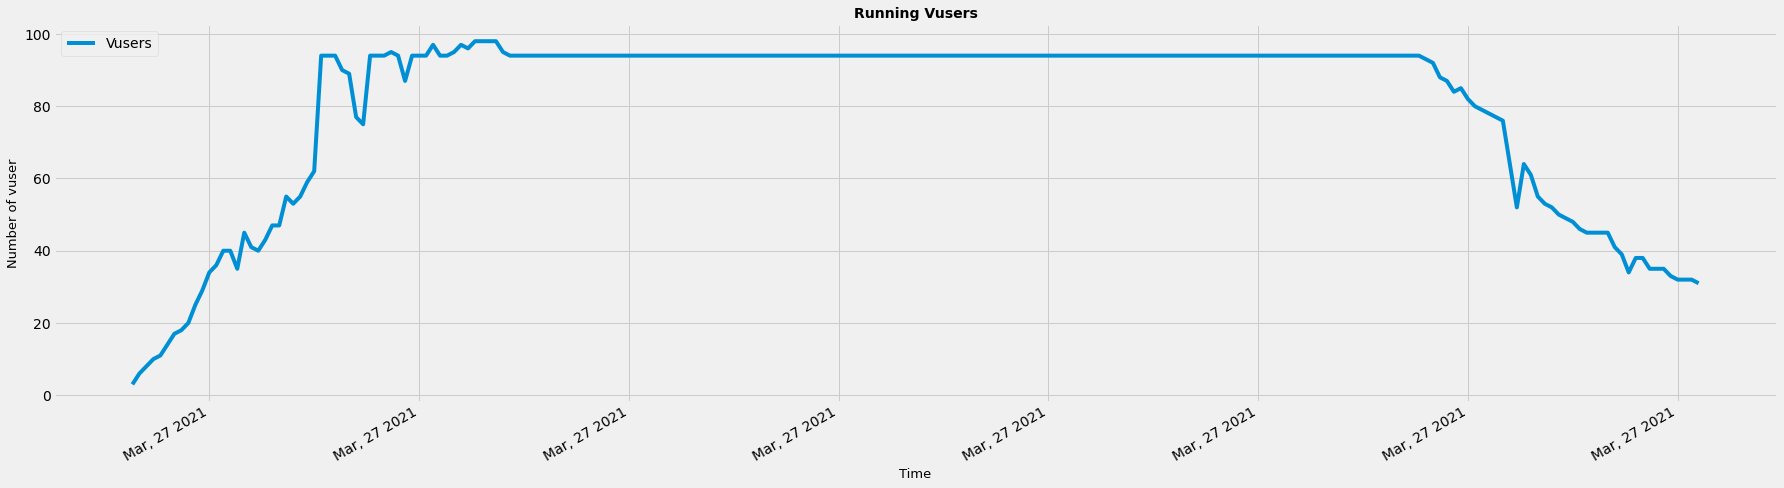

In [61]:
df_vuser=obj1.getRunnerVuserGraphData()
df_vuser.reset_index('timeStamp',inplace=True)
#Draw Graph
plt.style.use('fivethirtyeight')#print(plt.style.available)
plt.figure(figsize=(25,7))
plt.plot(df_vuser['timeStamp'],df_vuser['Vusers'],label='Vusers')#color="m",linestyle='-',linewidth=3,marker='.' #Important Line x & Y axis #crimson
plt.title("Running Vusers",fontsize=14,fontweight="bold")
plt.xlabel("Time",fontsize=13)#,fontweight="bold"
plt.ylabel("Number of vuser",fontsize=13)#,fontweight="bold"
plt.legend(loc='upper left')#This will take label name from plt.plot. So no need to pass the labe in sequence order
plt.gcf().autofmt_xdate()#plt.xticks(rotation=45,fontsize=13)
date_format=mpl_dates.DateFormatter('%b, %d %Y')#To formate the x axis with date format
plt.gca().xaxis.set_major_formatter(date_format)#To formate the x axis with date format
plt.tight_layout()#Automatically render without padding issue #plt.grid(True)
plt.show()
#plt.savefig("Vuser.png")


In [ ]:
#Draw Hits Summary

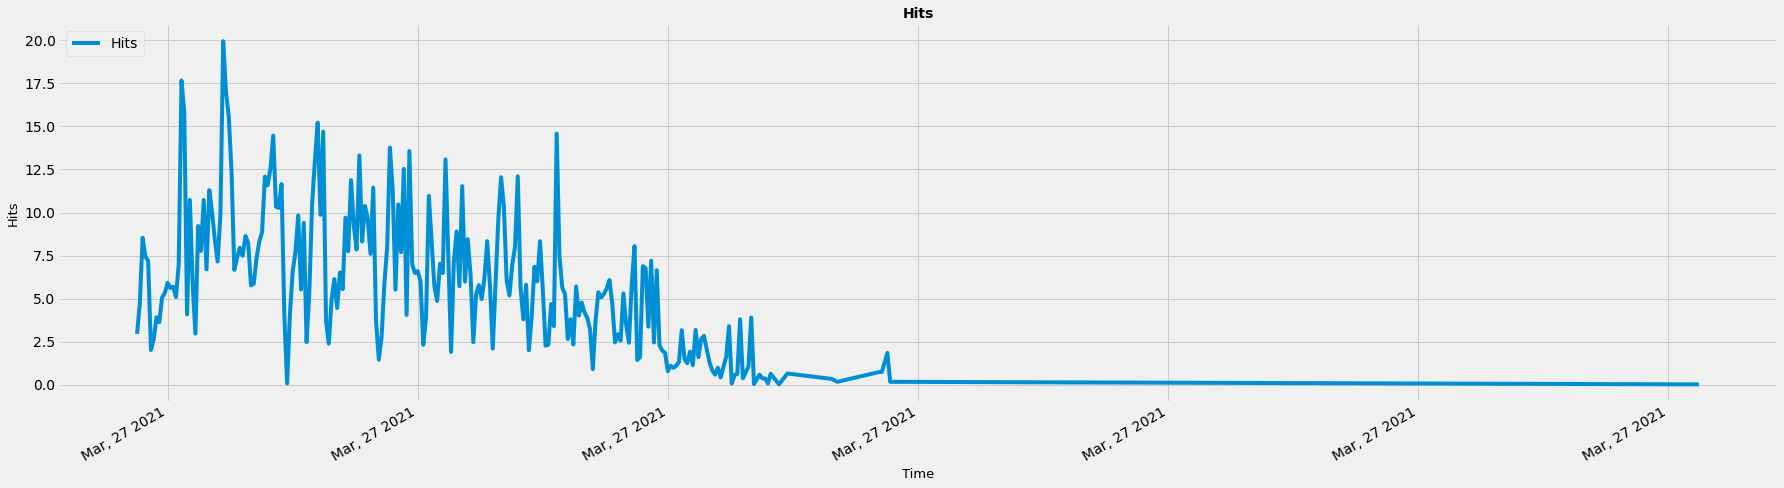

In [62]:
df_hits=obj1.getHitsPersecondGraphData()
df_hits.reset_index('timeStamp',inplace=True)
#Draw Graph
plt.style.use('fivethirtyeight')#print(plt.style.available)
plt.figure(figsize=(25,7))
plt.plot(df_hits['timeStamp'],df_hits['hitsCount'],label='Hits')#color="m",linestyle='-',linewidth=3,marker='.' #Important Line x & Y axis #crimson
plt.title("Hits",fontsize=14,fontweight="bold")
plt.xlabel("Time",fontsize=13)#,fontweight="bold"
plt.ylabel("Hits",fontsize=13)#,fontweight="bold"
plt.legend(loc='upper left')#This will take label name from plt.plot. So no need to pass the labe in sequence order
plt.gcf().autofmt_xdate()#plt.xticks(rotation=45,fontsize=13)
date_format=mpl_dates.DateFormatter('%b, %d %Y')#To formate the x axis with date format
plt.gca().xaxis.set_major_formatter(date_format)#To formate the x axis with date format
plt.tight_layout()#Automatically render without padding issue #plt.grid(True)
plt.show()
#plt.savefig("Vuser.png")

In [63]:
#Draw Throughput Received

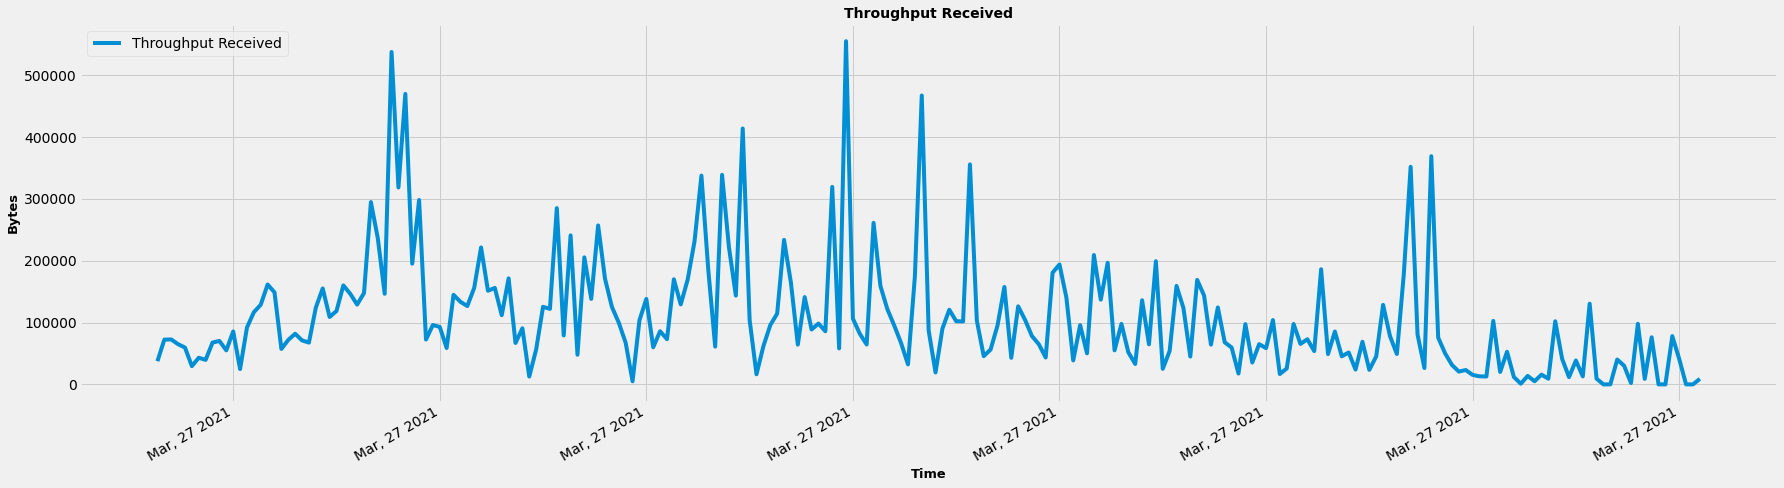

In [64]:
df_throughput=obj1.getThrouhputPersecondGraphData()
df_throughput.reset_index('timeStamp',inplace=True)


#Draw Graph
plt.style.use('fivethirtyeight')#print(plt.style.available)
plt.figure(figsize=(25,7))
plt.plot(df_throughput['timeStamp'],df_throughput['ThroughputReceived'],label='Throughput Received')#color="m",linestyle='-',linewidth=3,marker='.' #Important Line x & Y axis #crimson
plt.title("Throughput Received",fontsize=14,fontweight="bold")
plt.xlabel("Time",fontsize=13,fontweight="bold")#,fontweight="bold"
plt.ylabel("Bytes",fontsize=13,fontweight="bold")#,fontweight="bold"
plt.legend(loc='upper left')#This will take label name from plt.plot. So no need to pass the labe in sequence order
plt.gcf().autofmt_xdate()#plt.xticks(rotation=45,fontsize=13)
ax = plt.gca()
ax.ticklabel_format(useOffset=False, style='plain', axis='y')#To remove scientifice numbers
date_format=mpl_dates.DateFormatter('%b, %d %Y')#To formate the x axis with date format
plt.gca().xaxis.set_major_formatter(date_format)#To formate the x axis with date format
plt.tight_layout()#Automatically render without padding issue #plt.grid(True)
plt.show()


In [65]:
#Draw Throughput Send

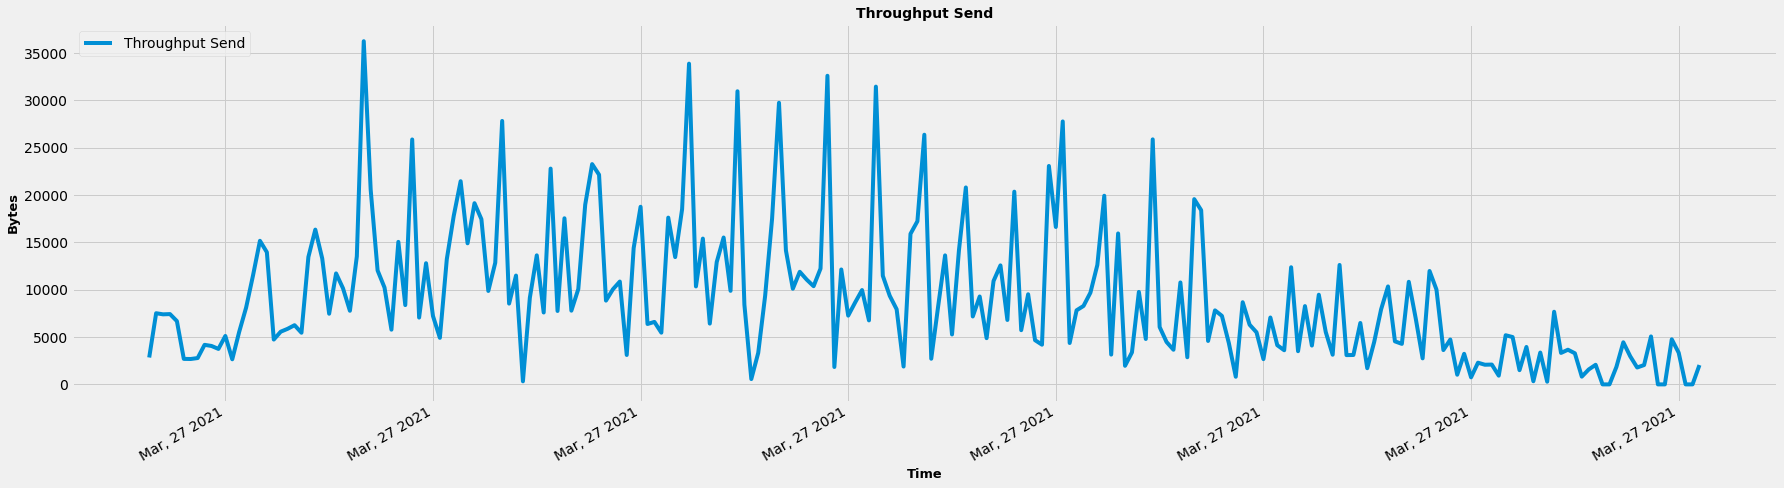

In [66]:
df_throughput_send=obj1.getThrouhputSendPersecondGraphData()
df_throughput_send.reset_index('timeStamp',inplace=True)

#Draw Graph
plt.style.use('fivethirtyeight')#print(plt.style.available)
plt.figure(figsize=(25,7))
plt.plot(df_throughput_send['timeStamp'],df_throughput_send['ThroughputSend'],label='Throughput Send')#color="m",linestyle='-',linewidth=3,marker='.' #Important Line x & Y axis #crimson
plt.title("Throughput Send",fontsize=14,fontweight="bold")
plt.xlabel("Time",fontsize=13,fontweight="bold")#,fontweight="bold"
plt.ylabel("Bytes",fontsize=13,fontweight="bold")#,fontweight="bold"
plt.legend(loc='upper left')#This will take label name from plt.plot. So no need to pass the labe in sequence order
plt.gcf().autofmt_xdate()#plt.xticks(rotation=45,fontsize=13)
ax = plt.gca()
ax.ticklabel_format(useOffset=False, style='plain', axis='y')#To remove scientifice numbers
date_format=mpl_dates.DateFormatter('%b, %d %Y')#To formate the x axis with date format
plt.gca().xaxis.set_major_formatter(date_format)#To formate the x axis with date format
plt.tight_layout()#Automatically render without padding issue #plt.grid(True)
plt.show()


In [67]:
#Draw Error Grph

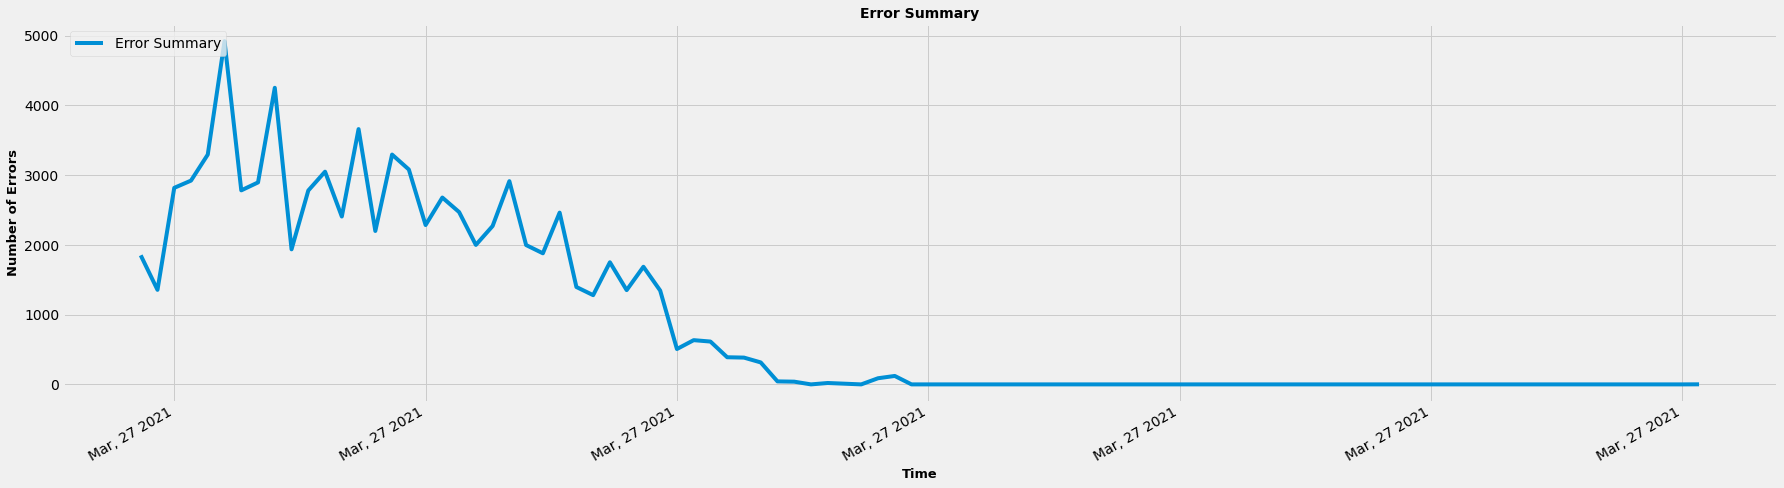

In [68]:
df_errors=obj1.getErrorPersecondGraphData()
df_errors.reset_index('timeStamp',inplace=True)

#Draw Graph
plt.style.use('fivethirtyeight')#print(plt.style.available)
plt.figure(figsize=(25,7))
plt.plot(df_errors['timeStamp'],df_errors['HTTPError'],label='Error Summary')#color="m",linestyle='-',linewidth=3,marker='.' #Important Line x & Y axis #crimson
plt.title("Error Summary",fontsize=14,fontweight="bold")
plt.xlabel("Time",fontsize=13,fontweight="bold")#,fontweight="bold"
plt.ylabel("Number of Errors",fontsize=13,fontweight="bold")#,fontweight="bold"
plt.legend(loc='upper left')#This will take label name from plt.plot. So no need to pass the labe in sequence order
plt.gcf().autofmt_xdate()#plt.xticks(rotation=45,fontsize=13)
ax = plt.gca()
ax.ticklabel_format(useOffset=False, style='plain', axis='y')#To remove scientifice numbers
date_format=mpl_dates.DateFormatter('%b, %d %Y')#To formate the x axis with date format
plt.gca().xaxis.set_major_formatter(date_format)#To formate the x axis with date format
plt.tight_layout()#Automatically render without padding issue #plt.grid(True)
plt.show()